In [107]:
# Description ths program uses Fibonacci Retracement levels and  MACD to indicate when to buy and sell stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as web
plt.style.use('fivethirtyeight')

In [109]:
#Load the data
stock = yf.Ticker('AAPL').history(start='2017-04-20',end='2017-08-24')
#df.set_index(pd.DatetimeIndex(df['Date'].values))
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-19,33.489351,33.517675,33.151812,33.206100,69313600,0.0,0
2017-04-20,33.333567,33.734834,33.319405,33.621536,93278400,0.0,0
2017-04-21,33.621532,33.678179,33.482269,33.581406,69283600,0.0,0
2017-04-24,33.871740,33.977957,33.796205,33.904785,68537200,0.0,0
2017-04-25,33.968513,34.202190,33.959069,34.114857,75486000,0.0,0
...,...,...,...,...,...,...,...
2017-08-17,38.194927,38.240137,37.557233,37.561993,111762400,0.0,0
2017-08-18,37.561998,37.952227,37.290741,37.476337,109712400,0.0,0
2017-08-21,37.476340,37.569138,36.907651,37.407337,105474000,0.0,0


In [110]:
df = web.DataReader('AAPL','yahoo','2017-04-20','2017-08-24')
#df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-19,35.500000,35.112499,35.470001,35.169998,69313600.0,33.206108
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.621532
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.581409
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.904785
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.114861
...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.476334
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.407341
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.018856


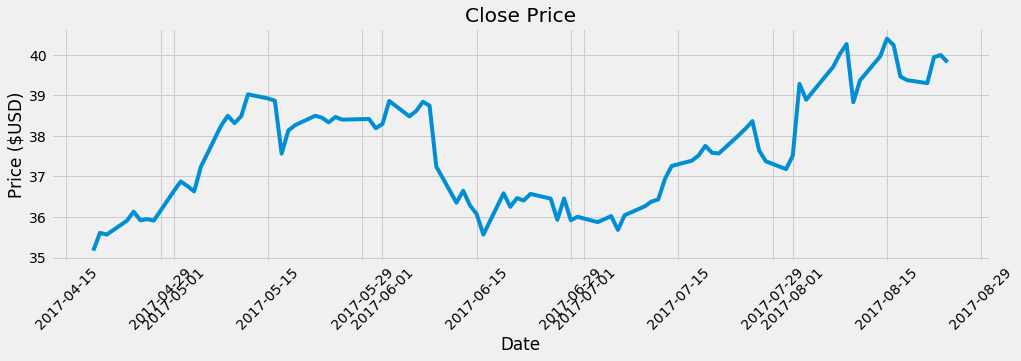

In [111]:
#plot the data
plt.figure(figsize=(15,4))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.xticks(rotation=45)
plt.show()

In [112]:
#CAlculate the Fibonacci Retracement
max_price =df['Close'].max()
min_price = df['Close'].min()
min_price

35.16999816894531

In [113]:
difference = max_price - min_price
first_level = max_price - difference *0.15
second_level = max_price - difference *0.30
third_level = max_price - difference *0.60
fourth_level = min_price + difference *0.20

In [114]:
# Calculate the MACD line and the Signal Line indicators
#Calculate the short term Exponential Moving Average 
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#Calculate the short term Exponential Moving Average
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#calculate the Moving Average Convergence/Divergence (MACD)
MACD =ShortEMA - LongEMA
#Calculate the signal Line
signal = MACD.ewm(span=9, adjust = False).mean()

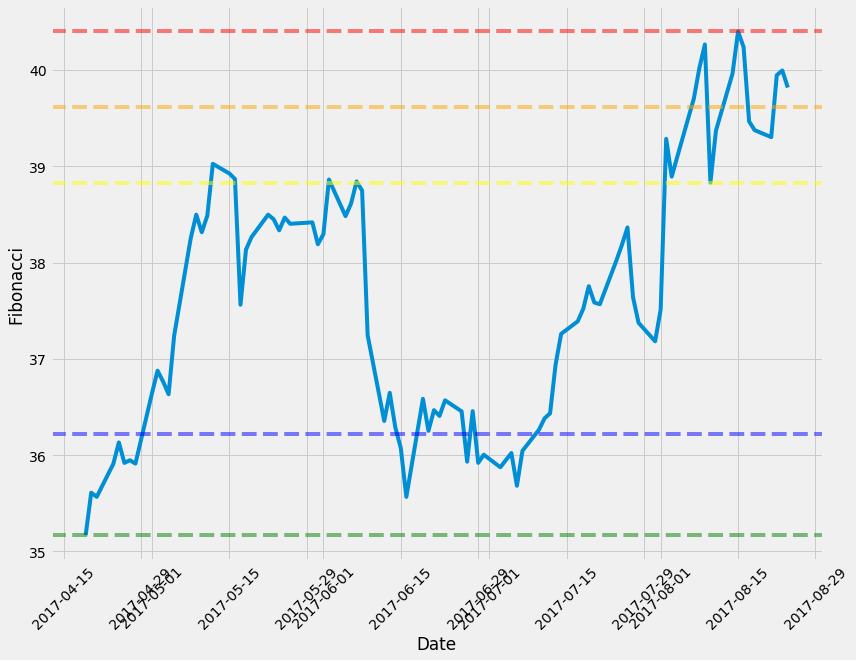

In [120]:
#Plot the Fibonacci Levels along with the close price and the MACD and Signal line
plt.figure(figsize=(12.33,9.5))
plt.plot(np.array(df.index),np.array(df['Close']))
plt.axhline(max_price,linestyle='--',alpha=0.5,color='red')
plt.axhline(first_level,linestyle='--',alpha=0.5,color='orange')
plt.axhline(second_level,linestyle='--',alpha=0.5,color='yellow')
plt.axhline(fourth_level,linestyle='--',alpha=0.5,color='blue')
plt.axhline(min_price,linestyle='--',alpha=0.5,color='green')
plt.xticks(rotation=45)
plt.ylabel('Fibonacci')
plt.xlabel('Date')
plt.show()

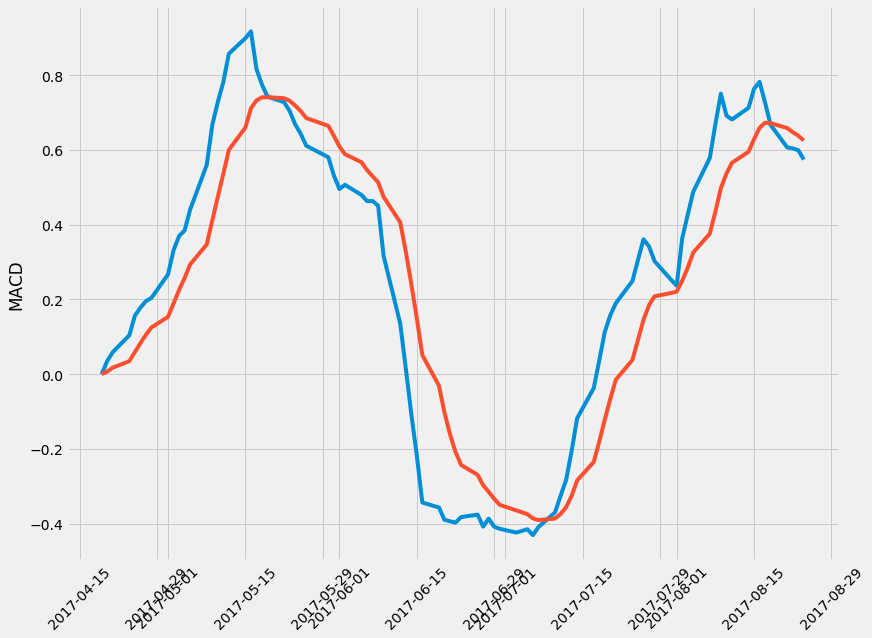

In [121]:
plt.figure(figsize=(12.33,9.5))
plt.plot(np.array(df.index),np.array(MACD))
plt.plot(np.array(df.index),np.array(signal))
plt.ylabel('MACD')
plt.xticks(rotation=45)
plt.show()

In [128]:
#Plot the Fibonacci Levels along with the close price and the MACD and Signal line
plt.figure(figsize=(12.33,9.5))
ax=fig.add_subplot(1,1,1)
plt.plot(np.array(df.index),np.array(df['Close']))
plt.axhline(max_price,linestyle='--',alpha=0.5,color='red')
ax.fll_between(df.index,maximum_price,first_level,color='red')
plt.axhline(first_level,linestyle='--',alpha=0.5,color='orange')
plt.axhline(second_level,linestyle='--',alpha=0.5,color='yellow')
plt.axhline(fourth_level,linestyle='--',alpha=0.5,color='blue')
plt.axhline(min_price,linestyle='--',alpha=0.5,color='green')
plt.xticks(rotation=45)
plt.ylabel('Fibonacci')
plt.xlabel('Date')
plt.show()

NameError: name 'fig' is not defined

<Figure size 887.76x684 with 0 Axes>